In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import matplotlib.pyplot as plt



In [73]:
df=pd.read_csv("../../datasets_merged/df_mergedFinal.csv")
numerical_columns = df.select_dtypes(include=['number'])
df_num=numerical_columns.drop(columns=['Annee_Souverainete','Break_1','Break_2', 'Break_3', 'Break_4', 'Break_5','Political_Regime', 'Mean_Rank_Univ'])
df_num

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Primary,Lower_Secondary,End_Of_The_School_Year_Break,Literacy_Rate_2021,...,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Averageiq_Ici2017Score,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,4.500000,574.000000,0.0,0.0,144098.0,5853838.0,NaN,NaN,NaN,37.27,...,NaN,1.426650e+10,82.12,NaN,368.0,358.0,376.0,346.873954,3.303561,NaN
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,NaN,NaN,NaN,NaN,...,3.09,1.793057e+10,81.75,23.4,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,NaN,NaN,NaN,NaN,...,6.30,1.634724e+11,76.00,19.1,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,4.504762,201.476190,0.0,0.0,45574.0,11132.0,NaN,NaN,NaN,NaN,...,2.58,3.325144e+09,95.20,NaN,NaN,NaN,NaN,41655.939232,NaN,NaN
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,NaN,NaN,NaN,NaN,...,2.30,6.650513e+10,75.10,NaN,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4.340741,372.740741,1.0,0.0,1324193.0,5415337.0,NaN,NaN,NaN,NaN,...,NaN,4.823593e+11,82.99,26.8,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,NaN,NaN,NaN,NaN,...,2.95,3.661376e+11,89.53,25.1,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,4.280000,48.250000,1.0,0.0,387113.0,1301166.0,NaN,NaN,NaN,NaN,...,NaN,2.160616e+10,62.86,NaN,NaN,NaN,NaN,641.196791,18.858729,NaN
195,3.975000,288.250000,0.0,0.0,187955.0,200700.0,NaN,NaN,NaN,NaN,...,3.11,2.209642e+10,68.43,18.9,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [74]:
df_num.drop(['Averageiq_Ici2017Score', 'Averageiqpisa2022Meanscoremathematics','Averageiqpisa2022Meanscorereading','Averageiqpisa2022Meanscorescience'], axis=1, inplace=True)

# Supprimer les colonnes avec moind de 130 valeurs rensignées
df_num.drop(['Primary',"Lower_Secondary","End_Of_The_School_Year_Break","Literacy_Rate_2021","Global_rank_Literacy_rate","Nb_graduates","Nb_Foreign_Students" ], axis=1, inplace=True)


In [75]:
df_num.describe().loc['count']

Notes_Musees                           197.0
Nbvotes_Musees_Clean                   197.0
Nb_Prixnobel                           197.0
Nb_Univtop500                          197.0
Immigrationbycountry_Immigrants        192.0
Immigrationbycountry_Emigrants         192.0
Area                                   190.0
Population                             192.0
Education_Spending_2021                138.0
Gdp                                    197.0
Averageiqbycountry_Iqlynnbecker2019    197.0
Gdp_Percapita                          191.0
Indice_Evolution                       162.0
Name: count, dtype: float64

In [76]:
df_num_clean=df_num.dropna()
df_num_clean

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,81.75,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,76.00,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,75.10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,86.63,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,88.82,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,99.12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,87.59,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,89.01,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,89.53,3728.987606,47.202375


In [77]:
# Normaliser les données
scaler = StandardScaler()
df_num_clean=pd.DataFrame(scaler.fit_transform(df_num_clean), columns=df_num_clean.columns)

## Agglomerative Clustering

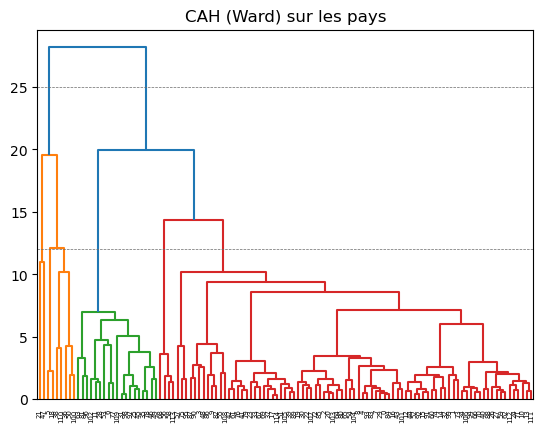

In [78]:
modele_agglomerativeClustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

modele_agglomerativeClustering.fit(df_num_clean)
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
plt.title("CAH (Ward) sur les pays")
# plot the top three levels of the dendrogram
plot_dendrogram(modele_agglomerativeClustering)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 12, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

## Kmeans

In [79]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(df_num_clean)
print("Le nombre de pays par cluster :")
pd.Series(kmeans2.labels_).value_counts()

c:\Users\racha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\racha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Le nombre de pays par cluster :


2    82
1    20
3     7
0     4
4     1
5     1
Name: count, dtype: int64

In [80]:
clusters_desc3 = df_num_clean.assign(classe = kmeans3.labels_)
clusters_desc3.groupby("classe").mean()

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
classe,,,,,,,,,,,,,
0,-0.084838,-0.298566,-0.263311,-0.341219,-0.290312,-0.088617,-0.143098,-0.131997,-0.080146,-0.223617,-0.259589,-0.406495,-0.260057
1,0.210596,1.571237,0.162289,2.382177,0.654475,5.559841,3.797006,7.315916,-0.275313,5.487385,0.555943,-0.404890,-0.603010
2,0.351614,1.158363,1.138097,1.267991,1.209514,-0.141283,0.265286,-0.118480,0.377334,0.457049,1.084300,1.819395,1.196727


In [91]:
# Appliquer la PCA
pca = PCA()
df_num_pca=pca.fit_transform(df_num_clean)
df_num_pca_df = pd.DataFrame({
    "Dim1" : df_num_pca[:,0], 
    "Dim2" : df_num_pca[:,1]
})


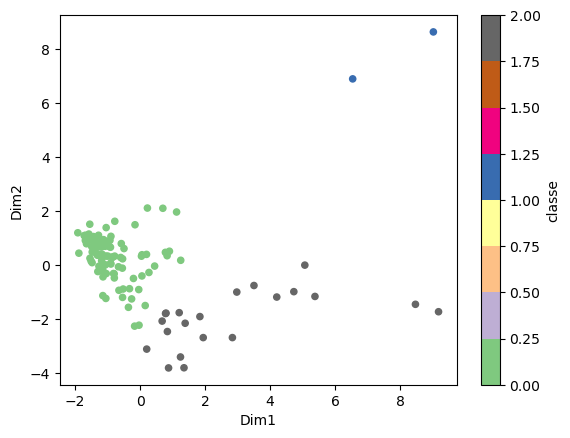

In [93]:
clusters_pca = df_num_pca_df.assign(classe = kmeans3.labels_)
clusters_pca.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()